# **ANN**

**🧠 Question:
Use the Digits dataset from sklearn.datasets to build and evaluate a Neural Network (ANN) for digit classification. Your tasks are:**

##### 1) Load and explore the dataset (e.g., image shapes, target labels).

##### 2) Preprocess the data (e.g., scaling the pixel values).

##### 3) Split the data into training and test sets (80-20 split).

##### 4) Create and train a Multi-layer Perceptron (MLP) classifier using MLPClassifier from sklearn.neural_network.

##### 5) Evaluate the model using accuracy, confusion matrix, and classification report.

##### 6) (Optional) Visualize some predicted vs actual digits using matplotlib.

In [19]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ld = load_digits()

In [3]:
ld_v = ld.data

In [4]:
ld_v

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
ss = StandardScaler()
ld_v = ss.fit_transform(ld_v)


In [6]:
ld_v

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [7]:
data = pd.DataFrame(ld_v, columns=ld.feature_names)

In [8]:
data['target'] = ld.target

In [9]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,0
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,1
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,2
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,3
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008,9
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008,0
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008,8
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008,9


In [10]:
X = data.drop(columns={'target'})
y = data['target']

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [12]:
mlp = MLPClassifier(early_stopping=True,learning_rate_init=0.01,verbose=True)

In [13]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.28319611
Validation score: 0.847222
Iteration 2, loss = 0.28474292
Validation score: 0.902778
Iteration 3, loss = 0.13459020
Validation score: 0.937500
Iteration 4, loss = 0.07505490
Validation score: 0.958333
Iteration 5, loss = 0.04985691
Validation score: 0.965278
Iteration 6, loss = 0.03172594
Validation score: 0.965278
Iteration 7, loss = 0.02176094
Validation score: 0.965278
Iteration 8, loss = 0.01674514
Validation score: 0.965278
Iteration 9, loss = 0.01292359
Validation score: 0.972222
Iteration 10, loss = 0.01036910
Validation score: 0.972222
Iteration 11, loss = 0.00851635
Validation score: 0.972222
Iteration 12, loss = 0.00731388
Validation score: 0.972222
Iteration 13, loss = 0.00631615
Validation score: 0.972222
Iteration 14, loss = 0.00553814
Validation score: 0.972222
Iteration 15, loss = 0.00488671
Validation score: 0.972222
Iteration 16, loss = 0.00436229
Validation score: 0.979167
Iteration 17, loss = 0.00393060
Validation score: 0.972222
Iterat

MLPClassifier(early_stopping=True, learning_rate_init=0.01, verbose=True)

In [14]:
y_pred_m = mlp.predict(X_test)

In [15]:
print(accuracy_score(y_test, y_pred_m))

0.9666666666666667


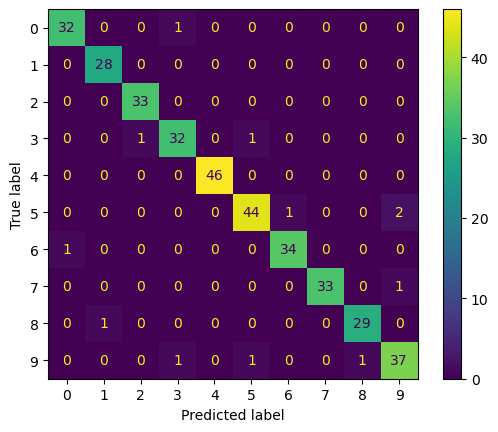

In [16]:
cm = confusion_matrix(y_test, y_pred_m)
cmd = ConfusionMatrixDisplay(cm,display_labels=ld.target_names)
cmd.plot()

In [17]:
a_V = pd.DataFrame({'actual':y_test,
                    'predicted':y_pred_m})

In [18]:
a_V

,actual,predicted
1245,6,6
220,9,9
1518,3,3
438,7,7
1270,2,2
...,...,...
1731,4,4
1630,3,3
1037,8,8
965,3,3


<Axes: >

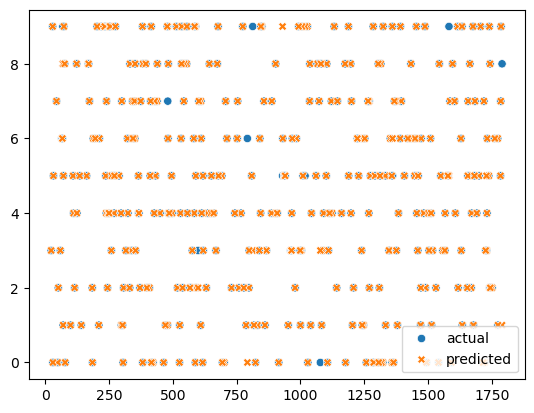

In [20]:
sns.scatterplot(a_V)

<Axes: >

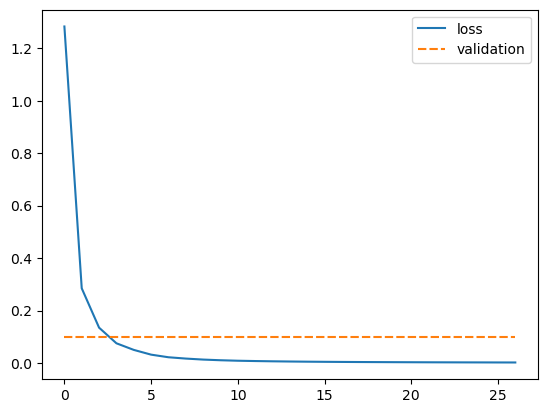

In [21]:
loss = mlp.loss_curve_
validation = mlp.validation_fraction
l_v = pd.DataFrame({'loss' : loss,
                    'validation' : validation})
sns.lineplot(l_v)

In [ ]:
mlp.coefs_ # weights

[array([[-6.28377136e-04,  3.07505931e-04, -7.61362164e-04, ...,
         -7.37215116e-04,  1.76038463e-05,  7.52637285e-04],
        [-1.33510079e-01, -5.47974746e-02,  4.93024547e-02, ...,
         -1.72517106e-01,  1.45453952e-01,  1.63729649e-01],
        [-5.08473165e-02,  2.82846299e-01, -1.08216784e-01, ...,
         -4.02468186e-02,  2.16537136e-01, -1.87116807e-02],
        ...,
        [ 3.81564105e-02, -3.87258065e-01,  3.61182311e-02, ...,
         -1.99588802e-02, -7.08648986e-03, -1.49439643e-01],
        [ 3.42703405e-01, -1.46062428e-01, -3.71050330e-01, ...,
         -1.29913638e-01,  1.55034706e-03, -1.60688948e-01],
        [ 1.19652315e-01, -3.49674346e-01, -1.50572475e-01, ...,
         -8.65040808e-02,  1.14745049e-01, -9.92510219e-02]]),
 array([[-1.71707201e-01, -4.19316665e-01,  3.38062595e-01,
          2.05687235e-01, -1.29225422e-01, -4.43010723e-01,
         -2.55988542e-01,  2.24294115e-01,  1.88995047e-01,
          8.75399654e-02],
        [ 2.74366300e-

In [27]:
mlp.intercepts_ # bias

[array([ 0.03106291,  0.27208096,  0.01824763,  0.22335185,  0.09836142,
        -0.19555118,  0.38525489,  0.12471551,  0.2755402 ,  0.21499666,
        -0.14730709,  0.03193022,  0.03310117,  0.30101412, -0.12816524,
         0.35301416, -0.03584098, -0.1145783 ,  0.09325446, -0.01249164,
         0.2745732 ,  0.02232778,  0.21914055,  0.16645156, -0.05157753,
        -0.00901281,  0.23095391,  0.01247912,  0.0432902 , -0.03167114,
        -0.20357135, -0.22437418,  0.04972503,  0.04967749,  0.12425598,
        -0.05897929,  0.11611992,  0.0028588 , -0.06564859,  0.09899847,
        -0.08391193,  0.07208766,  0.14828632,  0.23248472,  0.0325926 ,
         0.11944958,  0.10990816, -0.01002806, -0.12119877,  0.14713808,
        -0.17504818, -0.17414106, -0.25469573, -0.12753517, -0.06821216,
        -0.1439137 ,  0.05612271,  0.23384755,  0.02658892,  0.04440537,
         0.04671412,  0.09526866, -0.31362037,  0.14713398,  0.04398879,
         0.25652203,  0.12114504,  0.11645685,  0.1